# Fourier Transform 
The Fourier transform is an analysis process, decomposing a complex-valued function into its constituent frequencies and their amplitudes

for more understanding visit:- https://in.mathworks.com/help/images/fourier-transform.html#

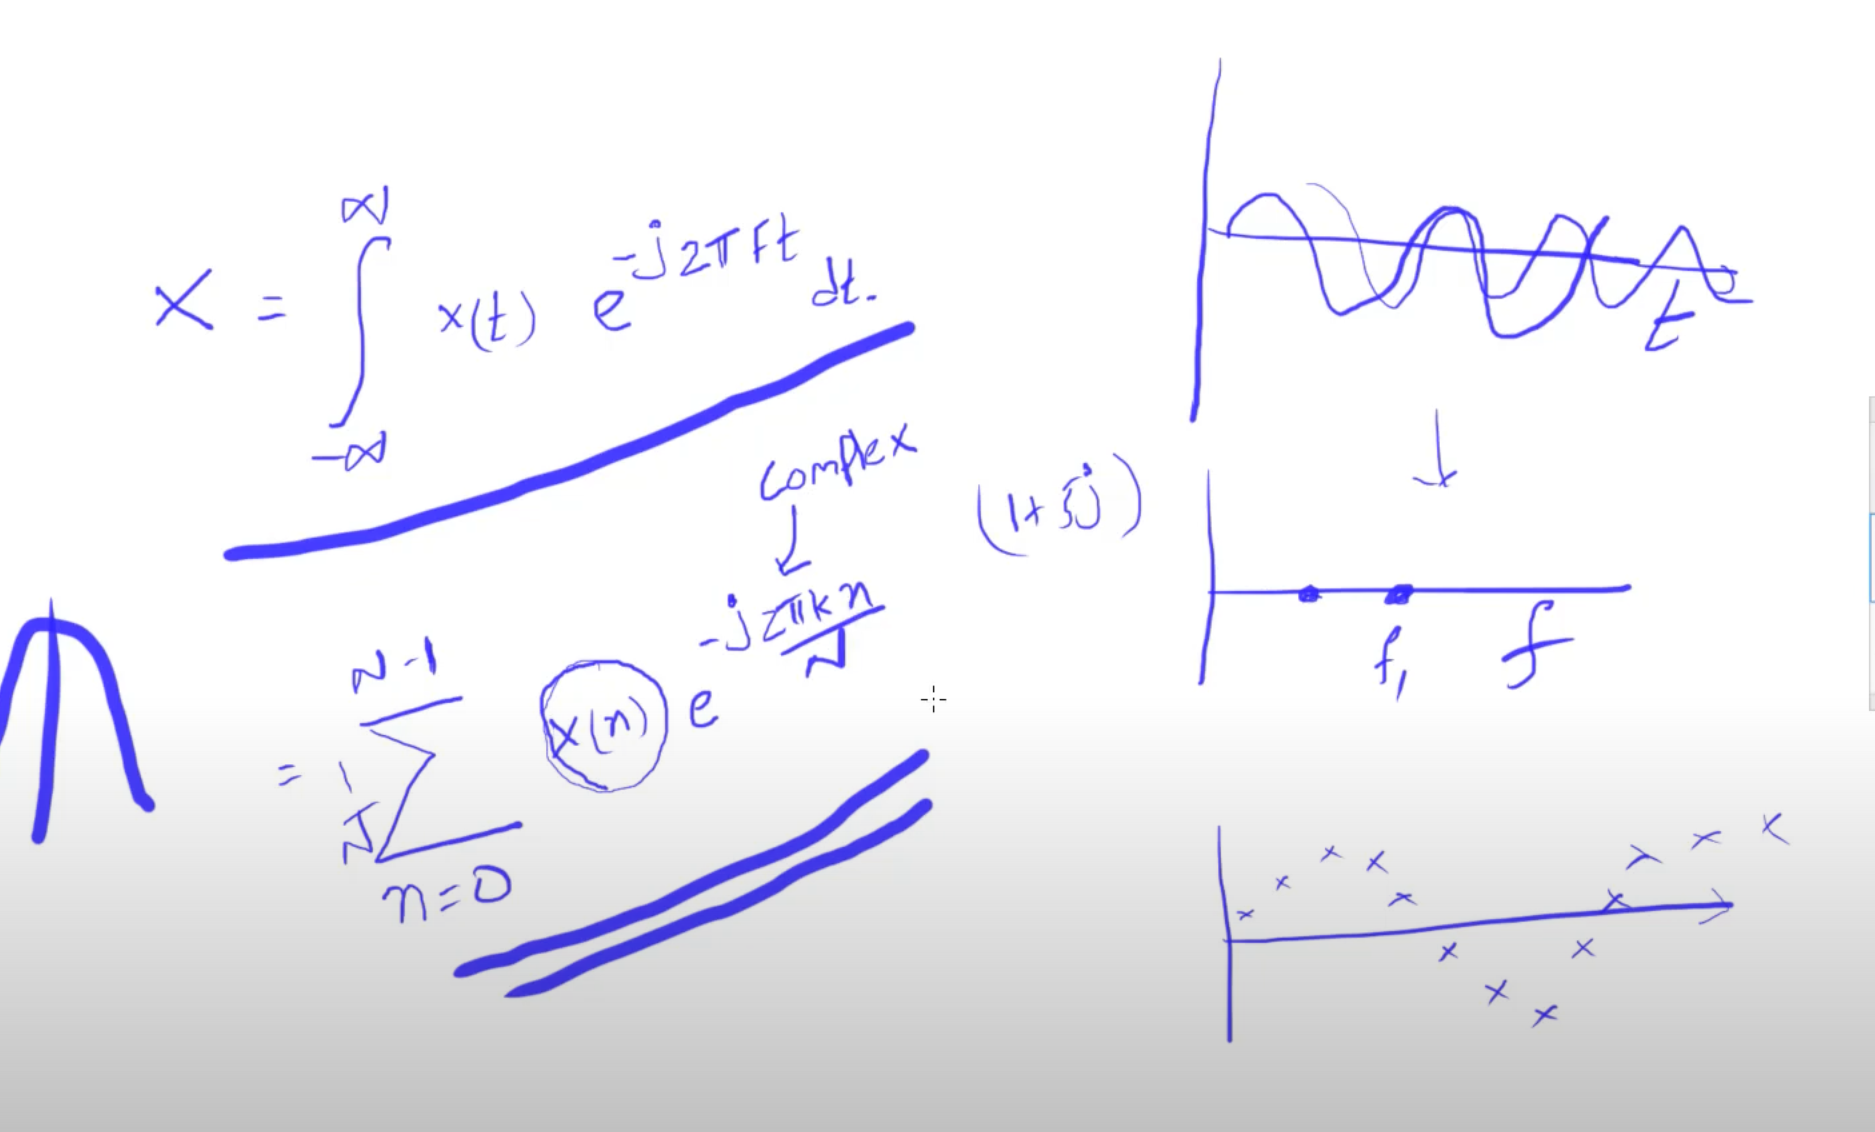

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

#Generate a 2D sine wave image
img = cv2. imread ("images/R1.jpg", 0)
dft = cv2. dft(np. float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np. fft. fftshift(dft)

magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:, 1])))
fig = plt. figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow (img)
ax1.title.set_text( 'Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow (magnitude_spectrum)
ax2.title.set_text( 'FFT of image' )
plt.show()

# Discrete Fourier Transform

In [ ]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imreq('images/BSE.jpg')

dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:,:,0], dft_shift[:,:,1]))

#HPF mask -> It allows pixels with higher frequency to pass it and lower ones get inside of it.

rows, cols = img.shape
crow, ccol = int(rows/2), int(cols/2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x,y = np.ogrid[:rows, :cols]
mask_area = (x-center[0]**2 + (y - center[1]**2 <= r*r))
mask[mask_area] = 0

fshift = dft_shift * mask

f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

fig = plt. figure(figsize=(12, 12))
ax1 = fig.add_subplot (2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image') 
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, map='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot (2,2,3)
#ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot (2,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()